# Download and visualize tool mentions and citations

This is a notebook that downloads information about mentioned and cited tools from a large list (bio.tools)

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Initialization

Get bio.tools publications from file and start the class

In [37]:
from bh24_literature_mining.utils import *
from bh24_literature_mining.europepmc_api import EuropePMCClient
import math

client = EuropePMCClient()

tools = load_biotools_pub("../biotoolspub/biotoolspub_with_pmids8.tsv")



### Add EDAM topics
Add EDAM topics to DataFrame "tools"

In [38]:
# Now include EDAM topics for each tool
biotools = load_biotools_from_zip(
    "../biotoolspub/biotoolsdump.zip", "biotools.json"
)

# get all biotoolsIDs from biotools list
biotools_ids = [tool["biotoolsID"] for tool in biotools]

# for each tool, get the EDAM topics and add as new column to "tools"
for index, row in tools.iterrows():
    biotoolsID = row["biotoolsID"]
    # get index of biotoolsID in biotools_ids
    try:
        bio_index = biotools_ids.index(biotoolsID)
    except ValueError:
        continue
    # get EDAM topics for tool
    edam_topics = biotools[bio_index]["topic"]
    # Get term elements for each edam_topic
    edam_topics = [edam_topic["term"] for edam_topic in edam_topics]
    # add EDAM topics to tools dataframe
    tools.at[index, "EDAM_topics"] = ", ".join(edam_topics)

### Run queries to Europe PMC 

In [90]:
tools = tools[:50]
biotools_mentions = client.get_mentions_for_tools(tools, True)
biotools_cites = client.get_cites_for_tools(tools)

Total number of tools:  20
Iter: 0, Name: Seurat, PubMed ID: 34062119, Link: fulltexts/PMC8238499.xml
"Seurat" AND ("RNA-Seq" OR "Transcriptomics")
Iter: 1, Name: anndata, PubMed ID: nan, Link: fulltexts/PMC5802054.xml
"anndata"
Iter: 2, Name: blast_rbh, PubMed ID: nan, Link: fulltexts/PMC2803857.xml
"blast_rbh"
Iter: 3, Name: Bakta, PubMed ID: 34739369, Link: fulltexts/PMC8743544.xml
"Bakta" AND ("Genomics" OR "Data submission" OR "annotation and curation" OR "Sequence analysis")
Iter: 4, Name: MUMmer4, PubMed ID: nan, Link: fulltexts/PMC5802927.xml
"MUMmer4"
Iter: 5, Name: PscanChIP, PubMed ID: nan, Link: fulltexts/PMC3692095.xml
"PscanChIP" AND ("Sequence sites" OR "features and motifs")
Iter: 6, Name: gget, PubMed ID: 38377393, Link: fulltexts/PMC10927331.xml
"gget" AND ("Biology" OR "Computational biology" OR "Omics")
Iter: 7, Name: SIBiLS, PubMed ID: 32379317, Link: fulltexts/PMC7319474.xml
"SIBiLS" AND ("Literature and language" OR "Workflows" OR "Bioinformatics" OR "Personalise

### Visualize results

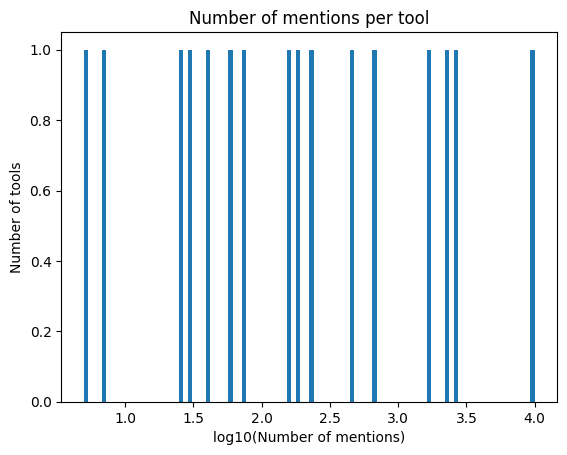

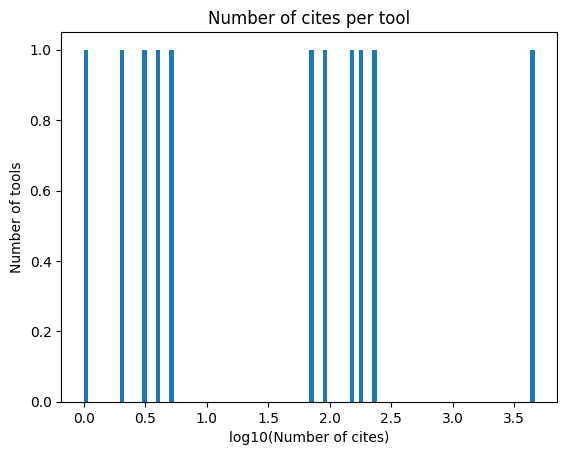

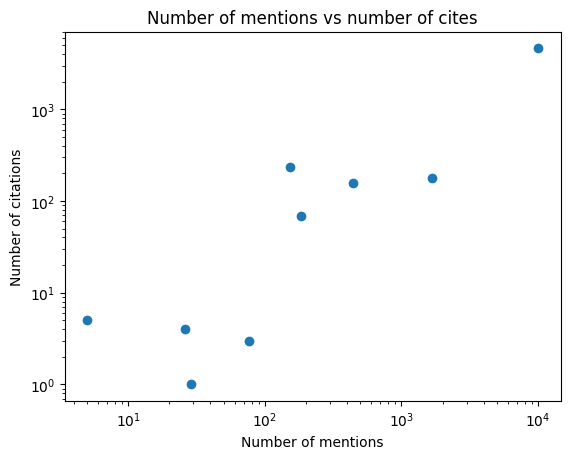

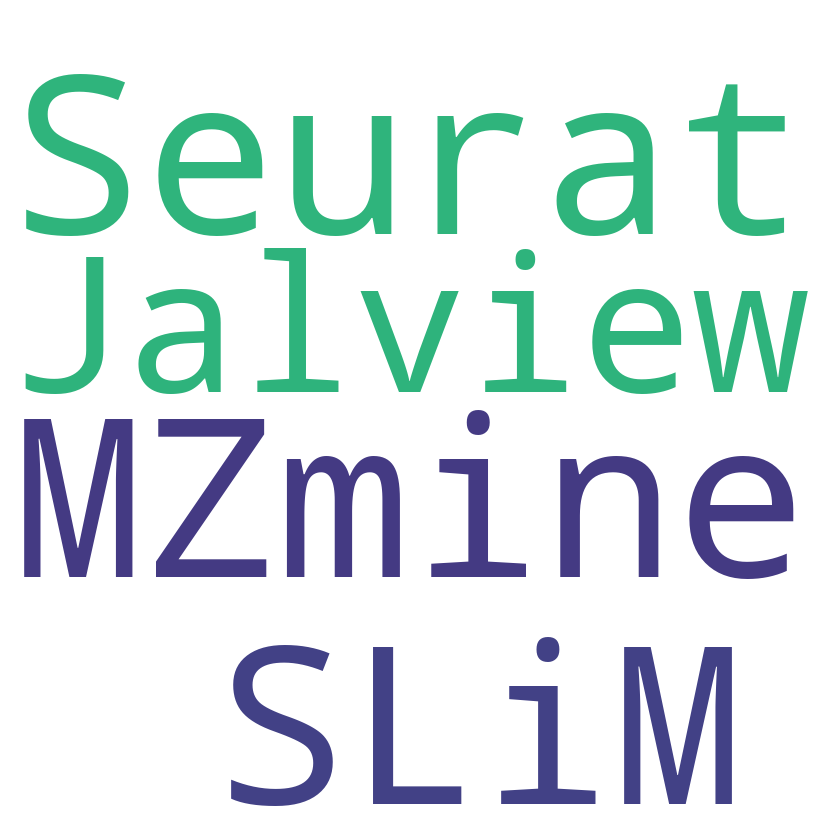

In [89]:
from bh24_literature_mining.visualizations import plot_histogram, compare_mentions_cites, wordcloud_most_mentioned

plot_histogram(biotools_mentions, "mentions")
plot_histogram(biotools_cites, "cites")

compare_mentions_cites(biotools_mentions, biotools_cites)

wordcloud_most_mentioned(biotools_mentions, 1000)

### Save results

In [124]:
# save as json file
save_to_json(biotools_cite, "../var/biotools_cites.json")
save_to_json(biotools_mentions, "../var/biotools_mentions.json")

In [40]:
biotools = load_biotools_from_zip("../biotoolspub/biotoolsdump.zip", "biotoolsdump/biotools.json")

In [62]:
# get structure of biotools list item 0
biotools[

'Functional, regulatory and non-coding RNA'

In [21]:
tools[50]

KeyError: 50

In [86]:
a = tools["EDAM_topics"][1]
a == ""

True